<a href="https://colab.research.google.com/github/kevinajordan/DS-Training/blob/master/16_Facial_Keypoints_Detection_Keras_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Keypoint Detection

Inspired by Udacity's Computer Vision Nanodegree project 1 [Udacity FKP GitHub Page](https://github.com/udacity/P1_Facial_Keypoints), with some modifications. This project will be all about defining and training a convolutional neural network to perform facial keypoint detection, and using computer vision techniques to transform images of faces.  The first step in any challenge like this will be to load and visualize the data you'll be working with. 

Let's take a look at an example of an image with corresponding facial keypoints.

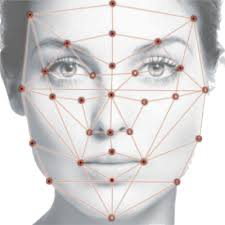

Facial keypoints (also called facial landmarks) are the small magenta dots shown on each of the faces in the image above. In each training and test image, there is a single face and **68 keypoints, with coordinates (x, y), for that face**.  These keypoints mark important areas of the face: the eyes, corners of the mouth, the nose, etc. These keypoints are relevant for a variety of tasks, such as face filters, emotion recognition, pose recognition, and so on. Here they are, numbered, and you can see that specific ranges of points match different portions of the face.


![alt text](https://lh6.googleusercontent.com/kb_PrLG_1k5EIr32SuHvSY01b5zmCrx84QQr62POFA-xas5s-NmvbQLZRAKOzMKtRcuCGl-Ha4wGJIpiR_SF8C-3QIes_IzIw2R8CVykalzkNilUXuWFuLk5Dxrqiky2xRW4LxVNCZo)



In the next section let's get into the data loading and pre-processing.


## EDA - Load, Visualize, and Understand The Data

The dataset we'll be working with for this project is the [YouTube Faces Dataset](https://www.cs.tau.ac.il/~wolf/ytfaces/).

You'll need to load in the images of faces and their keypoints and visualize them. These videos have been fed through some processing steps and turned into sets of image frames containing one face and the associated keypoints.



#### Training and Testing Data

This facial keypoints dataset consists of 5770 color images. All of these images are separated into either a training or a test set of data.

* 3462 of these images are training images, for you to use as you create a model to predict keypoints.
* 2308 are test images, which will be used to test the accuracy of your model.

The information about the images and keypoints in this dataset are summarized in CSV files, which we can read in using `pandas`. Let's read the training CSV and get the annotations in an (N, 2) array where N is the number of keypoints and 2 is the dimension of the keypoint coordinates (x, y).


In [0]:
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

In [0]:
# let's look in our data folder we just created to see what Udacity gives us.
!ls -la /data

In [0]:
# import the required libraries
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [0]:
# Set our working directory to /data
import os
os.chdir('/data')
os.getcwd()
os.listdir('.')

In [0]:
test_frames = pd.read_csv('/data/test_frames_keypoints.csv')
test_frames.head()

In [0]:
# Read in the training data into a Pandas dataframe and view the first 5 rows of data
key_pts_frame = pd.read_csv('/data/training_frames_keypoints.csv')
print(key_pts_frame.head())

Let's look at a single image's shape and the facial keypoints associated with it.

In [0]:
n = 0

# What pandas function can I use to grab the image name out of the first column?
image_name = key_pts_frame.iloc[n,0]

# Grab the key_point values, convert them to a numpy.ndarray object. as_matrix() is deprecated.
key_points = key_pts_frame.iloc[n,1:].values

# convert the values to data type 'float' and give me a listing of the key points in [x,y] format.
#key_pts = key_pts.astype('float').reshape(-1, 2)
key_points = key_pts.astype('float').reshape(68, 2)


print('Image name: ', image_name)
print('Landmarks shape: ', key_points.shape)
print('First 4 key pts: {}'.format(key_points[:4]))

In [0]:
# How many images do we have in the dataset? 
print('Number of images: ', len(key_pts_frame))

## Resizing and Converting to Grayscale with Keras Image Preprocessing

In [0]:
from keras.preprocessing.image import load_img, img_to_array, save_img
from numpy import expand_dims, asarray

img = load_img(os.path.join('/data/training/', image_name), color_mode = 'grayscale', target_size=(224, 224))
data = asarray(img)
print(data.shape)
# add in the grayscale channel
print("Adding in the grayscale channel with the expand_dims function.")
data_last = expand_dims(data, axis=2)
print(data_last.shape)
print(type(img))
print(img.size)


## Resizing and Converting to Grayscale with OpenCV

In [0]:
image_name = key_pts_frame.iloc[5,0]
im = cv2.imread(os.path.join('/data/training/', image_name))
im = cv2.resize(im, (224, 224))
if (im.shape[2] == 4):
  im = im[:,:,0:3]
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
print(type(im))
print(im.shape)

In [0]:
from numpy import expand_dims, asarray
im = expand_dims(im, axis=2)
print(im.shape)

Let's create a function to draw the keypoints on top of each image. This will be somewhat similar to what we did in the previous lesson, by using the matplotlib library.



In [0]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    # first plot (show) the image using matplotlib
    plt.imshow(image)
    
    # second, draw the key points on top of the plotted image using matplotlib
    plt.scatter(key_pts[:, 0], key_pts[:, 1], marker='.', c='m')

In [0]:
from keras.preprocessing.image import save_img
save_img('keras_gray_test.jpg', im)

Saving our new rescaled and greyscaled image. We are missing one step. See if you can spot what we missed doing?

In [0]:
from keras.preprocessing.image import load_img
im_gray = load_img('keras_gray_test.jpg')

In [0]:
# Grab the key_point values, convert them to a numpy.ndarray object. as_matrix() is deprecated.
key_points = key_pts_frame.iloc[5,1:].values

# convert the values to data type 'float' and give me a listing of the key points in [x,y] format.
#key_pts = key_pts.astype('float').reshape(-1, 2)
key_points = key_points.astype('float').reshape(68, 2)

plt.figure(figsize=(5, 5))
show_keypoints(im_gray, key_points)
plt.show()
print(im_gray.size)

In [0]:
# Display a few different types of images by changing the index n

# select an image by index in our data frame
image_name = key_pts_frame.iloc[n, 0]
image = mpimg.imread(os.path.join('/data/training/', image_name))
if (image.shape[2] == 4):
  image = image[:,:,0:3]
sample = {'image': image, 'keypoints': key_pts}  
train_df.append(sample)
                     

# Key_pts is our y
key_pts = key_pts_frame.iloc[n, 1:].values
key_pts = key_pts.astype('float').reshape(-1, 2)

plt.figure(figsize=(5, 5))
show_keypoints(mpimg.imread(os.path.join('/data/training/', image_name)), key_pts)
plt.show()

## Transforms

Now, the images above are not of the same size, and neural networks often expect images that are standardized; a fixed size, with a normalized range for color ranges and coordinates, and are tensors of float values.

Therefore, we will need to write some pre-processing code.

Let's create four transforms:

-  ``Normalize``: to convert a color image to grayscale values with a range of [0,1] and normalize the keypoints to be in a range of about [-1, 1]
-  ``Rescale``: to rescale an image to a desired size.
-  ``RandomCrop``: to crop an image randomly.
-  ``ToTensor``: to convert numpy images to tensor images.

I recommend looking at these guides for help in doing these transformations in Keras.

[How To Normalize Center and Standardize Images in Keras](https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/)

[How To Load, Convert, and Save Images in Keras](https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/)

[How To Use Pre-Trained VGG Model in Keras](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/)


Helpful code snippets from the above tutorials by Jason Brownlee are listed below:
```
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img('bondi_beach.jpg')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()
```

```
# example of converting an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
# load the image
img = load_img('bondi_beach.jpg')
print(type(img))
# convert to numpy array
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
# convert back to image
img_pil = array_to_img(img_array)
print(type(img))
```

```
# importing pre-trained model example
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())
```


Helpful code snippet from Udacity's project code
```
# convert image to grayscale
image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# scale color range from [0, 255] to [0, 1]
image_copy=  image_copy/255.0

# scale keypoints to be centered around 0 with a range of [-1, 1]
# mean = 100, sqrt = 50, so, pts should be (pts - 100)/50
key_pts_copy = (key_pts_copy - 100)/50.0
```

Observe some examples below how these transforms are generally applied to both the image and its keypoints.

**these are one way to code these transforms, but not the ONLY way. There are many ways**



In [0]:
class Normalize(object):
    """Convert a color image to grayscale and normalize the color range to [0,1]."""        

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)

        # convert image to grayscale. Use image_copy
        cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # scale color range from [0, 255] to [0, 1]. Use image_copy
        
        
        # scale keypoints to be centered around 0 with a range of [-1, 1]
        # mean = 100, sqrt = 50, so, pts should be (pts - 100)/50
        key_pts_copy = _______


        return {'image': image_copy, 'keypoints': key_pts_copy}


In [0]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = cv2.resize(image, (new_w, new_h))
        
        # scale the pts, too
        key_pts = key_pts * [new_w / w, new_h / h]

        return {'image': img, 'keypoints': key_pts}

In [0]:
class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        key_pts = key_pts - [left, top]

        return {'image': image, 'keypoints': key_pts}

## Create Training Data Frame

We have the data and we have csv files with the names of the images and their keypoints, but it's not in a format we can work with.

Each image needs to be read in and the pixel values stored in one column representing our features (x).

The Keypoints need to be reformatted as [x,y] pairs and stored in one column representing our target variable (y).


In [0]:
samples = []

for n in range(3):
  imName = key_pts_frame.iloc[n, 0]
  print ('adding in image: ', imName)
  image = mpimg.imread(os.path.join('/data/training/', imName))
  
  #if there are 4 channels, change it to having only 3
  if (image.shape[2] == 4):
    image = image[:,:,0:3]
  
  # Grab the keypoints values and reshape them as [x,y]
  key_pts = key_pts_frame.iloc[n, 1:].values
  key_pts = key_pts.astype('float').reshape(-1, 2)
  
  # Create a sample as a dictionary of image and keypoints. Append this to the samples list created above.
  sample = {'image': image, 'keypoints': key_pts}  
  samples.append(sample)

In [0]:
train_df = pd.DataFrame(samples)
print(train_df.head())

In [0]:
print(train_df['image'][0].shape)

### Sample code below for using ImageDataGenerator to apply some transformations

In [0]:
# create and configure the data generator
datagen = ImageDataGenerator()

# calculate scaling statistics on the training dataset
datagen.fit(trainX)

# get batch iterator
train_iterator = datagen.flow(trainX, trainy)

# fit model
model.fit_generator(train_iterator, ....)

# get batch iterator for training
train_iterator = datagen.flow(trainX, trainy)
# get batch iterator for validation
val_iterator = datagen.flow(valX, valy)
# fit model
model.fit_generator(train_iterator, validation_data=val_iterator, ...)

# get batch iterator for testing
test_iterator = datagen.flow(testX, testy)
# evaluate model loss on test dataset
loss = model.evaluate_generator(test_iterator, ...)

# Normalization
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare an iterators to scale images


## Sample Code: Apply The Transformations with Keras

In [0]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    horizontal_flip=True,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=1.0/255.0,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format="channels_last",
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.3)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)


## Create Model Architecture

For this lesson, as a baseline, reproduce the model architecture and performance documented in this research paper:

[NamishNet](https://arxiv.org/pdf/1710.00977.pdf)

Recall that CNN's are defined by a few types of layers:

* Convolutional layers
* Maxpooling layers
* Fully-connected layers

In [0]:
# Create your neural network

from keras import models 
from keras import layers

model = Sequential()

# 1st Conv layer
model.add(Conv2D(32, (4,4), activation='elu', input_shape=(224,224,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

# 2nd Conv layer
model.add(Conv2D(64, (3,3), activation='elu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# 3rd Conv layer
model.add(Conv2D(128, (2,2), activation='elu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# 4th Conv layer
model.add(Conv2D(256, (1,1), activation='elu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

# Flatten from 3D to 1D Tensor
model.add(Flatten())

# 1st fully connected (Dense) layer
model.add(Dense(1000, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.5))

# 2nd fully connected (Dense) layer
model.add(Dense(1000, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.6))

# output layer
model.add(Dense(2, kernel_initializer='glorot_uniform', activation='softmax'))
          
  

In [0]:
# compile your neural network

model.compile(loss='rmse', optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), metrics=['acc'])

In [0]:
# train your neural network
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    workers=4)

In [0]:
# Evaluate your model on the test images
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [0]:
# (opt) Save a model with decent performance

## Model Knowledge Check



### Question 1: What optimization and loss functions did you choose and why?


### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

### Question 3: How did you decide on the number of epochs and batch_size to train your model?